<a href="https://colab.research.google.com/github/BurgundyIsAPublicEnemy/EPIDEMIUM-Season-3/blob/analysis/AnalysisNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and Medical Explanation of Elneny
Elneny is a mutli-modal interpretable convolutional network based on siamese similarity pretraining model, with both convolutional and tabular DL elements combined into one element. While performant (topping the ORL/IA leaderboar), it's complexity is a challenge to explain.

The challenge is: determine a statistical link between the presence of one or more markers, in the tumor, in the stroma or in the microenvironment as a whole and better overall survival. 

We determine this in two methods:

1a) Leave-One-Out Strategy to determine marker importance

1b) Manual evaluation using medical expertise

2) Tabular Feature importance using XGBoost

# Leave-One-Out Strategy to select out markers
In this experiment, we retrain our model repeatedly, changing which markers we include. Using RunModel Notebook and filtering out layers on the 'layers' column, each model is trained 5 times across all folds, and validated 5 times.

Originally, we trained the model with all the data to allow it to decide for itself what features are important and which are not. Here, we present the following: 

| Layers      | Average Val Loss |
| ----------- | ---------------- |
| All         | 8.9123384        |
| 1,2,3,4,5,6 | 17.98870134      |
| 1,2,3,5,6   | 10.50769776      |
| 1,2,3,6     | 7.15650308       |
| 2,3,6       | 11.9904319       |
| 2,3         | 9.78866528       |
| 2           | 13.8633732       |
| 1           | 13.3617568       |
| 4           | 11.10145488      |
| 3           | 7.902646         |
| 5           | 8.1658692        |
| 6           | 11.9080366       |




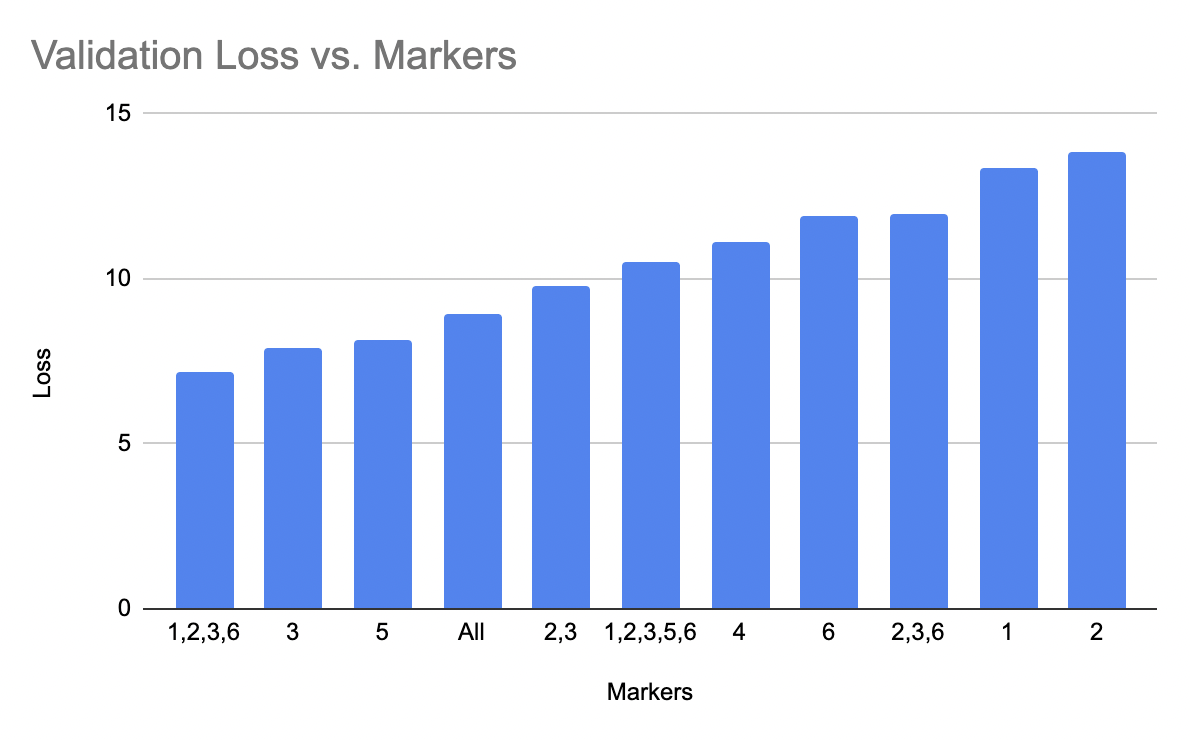

One can see that layers 1,2,3,6 produce the model with the best results, proving that one layer is not outright better than the others.

However, 3 and 5 prove to be very good on their own

But why is this the case?

## Manual evaluation
The dataset is a small representation and this model can't be used to give any real scientific insights. 

Therefore, we first generate visualisations of attention in model decisions from the model and then have medical expertise identify which layer it is looking at

### How it works:
[We compare our GRADCAM visuals with Fiji](https://drive.google.com/file/d/12jM_2HyZhgFly5kNyzfhtiLQuyoXF-hq/preview)

Mark whether the heatmap is captured by the layer in the TIF file

[Good example](https://drive.google.com/file/d/1Dmg1oGaWaDhcmQHdFsG1cirsbEFNscXQ/view)

[Bad example](https://drive.google.com/file/d/1nIhF_pfBccjL0z7sIttyy_0T1CS9WF7_/view)


Using this key (verified by medical comittee):

```
Layer 1= Inflammatory cells 2
Layer 2= tumor marker (cytokeratin staining)
Layer 3= nuclei (DAPI stain)
Layer 4= Infl cells 5
Layer 5= Infl cells 3
Layer 6= Infl cells 6
Layer 7= Infl cells 4
Layer 8= infl cells 1
Layers 9/10 = overall tissue
```



Overall ranking 

| ID      | Layer 1 | Layer 2 | Layer 3 | Layer 4 | Layer 5 | Layer 6 | Layer 7 | Layer 8 | Layer 9 | Layer 10 |
| ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | -------- |
| 1       | 0       | 0       | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0        |
| 2       | 0       | 1       | 1       | 0       | 0       | 1       | 0       | 0       | 0       | 0        |
| 3       | 1       | 0       | 0       | 0       | 1       | 1       | 0       | 0       | 0       | 0        |
| 4       | 1       | 0       | 0       | 0       | 1       | 1       | 0       | 0       | 0       | 0        |
| 5       | 0       | 1       | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0        |
| 6       | 0       | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0       | 0        |
| 7       | 0       | 0       | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0        |
| 8       | 1       | 0       | 0       | 0       | 1       | 1       | 1       | 0       | 0       | 0        |
| 9       | 1       | 0       | 0       | 1       | 1       | 0       | 0       | 0       | 0       | 0        |
| 10      | 1       | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0       | 0        |
| 11      | 1       | 0       | 0       | 0       | 1       | 1       | 0       | 0       | 0       | 0        |
| 12      | 1       | 0       | 0       | 0       | 1       | 1       | 0       | 0       | 0       | 0        |
| 13      | 0       | 1       | 0       | 0       | 1       |         | 0       | 0       | 0       | 0        |
| 14      | 0       | 0       | 0       | 1       | 1       | 1       | 1       | 1       | 0       | 0        |
| 15      | 1       | 0       | 1       | 0       | 0       | 1       | 0       | 0       | 0       | 0        |
| 16      | 0       | 1       | 0       | 0       | 0       | 1       | 0       | 0       | 0       | 0        |
| 17      | 1       | 0       | 0       | 0       | 1       | 0       | 1       | 0       | 0       | 0        |
| 18      | 1       | 0       | 0       | 1       | 1       | 1       | 0       | 0       | 0       | 0        |
| Sum     | 10      | 4       | 2       | 5       | 13      | 10      | 3       | 1       | 0       | 0        |
| Ranking | 2       |         |         | 3       | 1       | 2       | 4       | 5       |         |

This gives a total order of: Marker 3 > Marker 2 & Marker 6 > Marker 5 & Marker 4 > 1

## Extra: Low OS and High OS

|                | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| -------------- | - | - | - | - | - | - | - | - | - | -- |
| LOW OS         | 4 | 2 | 1 | 2 | 7 | 4 | 1 | 0 | 0 | 0  |
| HIGH OS        | 6 | 2 | 1 | 3 | 6 | 6 | 2 | 1 | 0 | 0  |
|                | 2 |   |   | 5 | 3 | 6 | 4 | 1 |   |    |
| Ranking (Low)  | 2 |   |   | 3 | 1 | 2 | 3 | 0 |   |    |
| Ranking (High) | 1 |   |   | 2 | 1 | 1 | 2 | 1 |   |

Giving an order of:
* HIGH:	3 > 6 & 2 > 4 & 5 > 1
* LOW:	3 & 6 & 2 > 5 & 4 > 1

## Medical insights as to what might be going on here
Go wild here, Rachel

## Observations
Both evaluation methods agree that Marker 3 is the most important, followed by 2 and 6. However, it is interesting that Marker 5 isn't as rated highly in the manual evaluation as it is in the Leave-One-Out strategy. The opposite is the case for Marker 1

## Considerations
This manual method is subjective (what could be matching on layer could also be not for someone else) and it is difficult to discern which layers has the most impact on the prediction directly due to model complexity. 

Explainability and performance always has a trade off and on reflection, designing our model around a pre-trained model which in itself, was a black box is what led to this outcome. However, we feel that having multiple experts validate this and having an academic jury would be the next step forward with this evaluation. 

This method isn't too dissimilar to what is done with other models: it is not uncommon for industry experts to be brought in to evaluate the performance of a model in a given situation. 

# Feature Importance from Tabular


In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import sklearn

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Kaggle/ORLIA/train_img_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Kaggle/ORLIA/test_img_data.csv")

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/ORLIA/train_img_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/ORLIA/test_img_data.csv")

In [ ]:
test_df.head()

,id,usage,image_file,image_rename,current_directory,layer,img_type,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,N,M,Tabac,Alcool,Data,id_encoding,image_rename_encoding
0,aabb0e,test,"aabb0e_[12238,43627]_composite_image.jpg","raw_Cellule inflamatoire 4_aabb0e_[12238,43627...",/content/drive/MyDrive/Kaggle/ORLIA/Test/,Cellule inflamatoire 4,raw,1,1,69.0,9.0,60,1,1,0,1,4,NaN,1,3,1,Image + clinical,1,136
1,a7b285,test,"a7b285_[13407,58051]_composite_image.jpg",raw_Cellules tumorales et cellules inflammatoi...,/content/drive/MyDrive/Kaggle/ORLIA/Test/,Cellules tumorales et cellules inflammatoires 3,raw,1,1,76.0,7.0,69,0,0,0,0,2,NaN,0,0,0,Image + clinical,0,200
2,ac3e32,test,"ac3e32_[11938,49725]_composite_image.jpg",raw_Cellules tumorales et cellules inflammatoi...,/content/drive/MyDrive/Kaggle/ORLIA/Test/,Cellules tumorales et cellules inflammatoires 3,raw,1,1,69.0,7.0,61,0,0,0,2,4,2.0,0,1,1,Image + clinical,2,208
3,b462ff,test,"b462ff_[11684,45221]_composite_image.jpg","raw_Cellule inflamatoire 1_b462ff_[11684,45221...",/content/drive/MyDrive/Kaggle/ORLIA/Test/,Cellule inflamatoire 1,raw,0,1,89.0,10.0,78,1,1,0,2,4,NaN,0,3,1,Image + clinical,7,92
4,ac8a8b,test,"ac8a8b_[16004,54038]_image_with_tissue_seg.jpg","composite_segmentation_tissue_ac8a8b_[16004,54...",/content/drive/MyDrive/Kaggle/ORLIA/Test/,segmentation_tissue,raw,0,1,68.0,9.0,59,0,0,0,2,4,NaN,0,3,1,Image + clinical,3,29


In [ ]:
train_data.head()

,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,M,Tabac,Alcool
0,0,1,65.0,10.0,55,0,0,0,2,1,0,2,1
1,1,1,76.0,7.0,69,1,0,0,1,2,0,3,1
2,1,1,84.0,8.0,76,1,0,0,1,4,1,2,1
3,1,1,54.0,9.0,44,0,0,0,2,3,0,3,1
4,0,0,63.0,9.0,54,0,0,0,2,2,0,0,1


In [ ]:
train_data.drop(['id' , 'usage' ,'image_file' ,'image_rename' ,'current_directory' ,'layer' ,'img_type' ,'N' ,'Data' ,'id_encoding' ,'image_rename_encoding'], axis=1, inplace=True)
test_df.drop(['id' , 'usage' ,'image_file' ,'image_rename' ,'current_directory' ,'layer' ,'img_type' ,'N' ,'Data' ,'id_encoding' ,'image_rename_encoding'], axis=1, inplace=True)

#Drop dups
train_data = train_data.drop_duplicates()
test_df = test_df.drop_duplicates()

labels = train_data['OS']


In [ ]:
train_data.head()

,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,M,Tabac,Alcool,OS
0,0,1,65.0,10.0,55,0,0,0,2,1,0,2,1,45
1,1,1,76.0,7.0,69,1,0,0,1,2,0,3,1,18
2,1,1,84.0,8.0,76,1,0,0,1,4,1,2,1,21
3,1,1,54.0,9.0,44,0,0,0,2,3,0,3,1,47
4,0,0,63.0,9.0,54,0,0,0,2,2,0,0,1,70


In [ ]:
len(train_data)

42

In [ ]:
train_data.drop(['OS'], axis=1, inplace=True)

In [ ]:
train_data.head()

,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,M,Tabac,Alcool
0,0,1,65.0,10.0,55,0,0,0,2,1,0,2,1
1,1,1,76.0,7.0,69,1,0,0,1,2,0,3,1
2,1,1,84.0,8.0,76,1,0,0,1,4,1,2,1
3,1,1,54.0,9.0,44,0,0,0,2,3,0,3,1
4,0,0,63.0,9.0,54,0,0,0,2,2,0,0,1


In [ ]:
len(labels)

42

In [ ]:
test_df.head()

,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,M,Tabac,Alcool
0,1,1,69.0,9.0,60,1,1,0,1,4,1,3,1
1,1,1,76.0,7.0,69,0,0,0,0,2,0,0,0
2,1,1,69.0,7.0,61,0,0,0,2,4,0,1,1
3,0,1,89.0,10.0,78,1,1,0,2,4,0,3,1
4,0,1,68.0,9.0,59,0,0,0,2,4,0,3,1


In [ ]:
len(test_df)

9

In [ ]:
!pip install shap

In [ ]:
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost 

model = XGBRegressor()

X = train_data
y = labels
# split dataset into input and output columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

params = {
    "objective": "reg:squarederror",
    "subsample": 0.5,
    "eval_metric": "mae",
    "max_depth": 8,
    "eta": 0.5
    
}

# fit model
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=200)

print(y_test)
print(model.predict(d_test))

[0]	test-mae:31.5602
Will train until test-mae hasn't improved in 200 rounds.
[100]	test-mae:6.1346
[200]	test-mae:6.07874
Stopping. Best iteration:
[16]	test-mae:5.65907

39     30
16     53
9      66
46     59
4      70
225    66
24     67
55     47
57     59
Name: OS, dtype: int64
[38.32112  59.887085 67.00676  54.589504 60.989216 67.23759  54.81095
 41.598732 53.95839 ]


In [ ]:
import shap
pred = model.predict(d_test, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(d_test)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()


3.8146973e-05

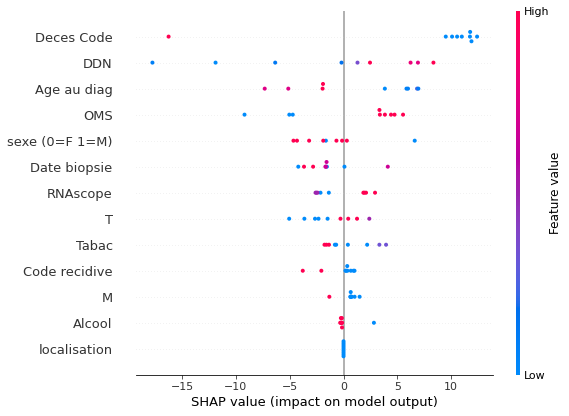

In [ ]:
shap.summary_plot(shap_values, X_test)

# Conclusion
When determining a statistical link between the presence of one or more markers, in the tumor, in the stroma or in the microenvironment as a whole and better overall survival... 

We find that Markers 3 (Layer 5), 2 (Layer 1) and 6 (Layer 6) to be strong indicators for better overall survival.

We also find that the age of the patient, whether they died or not (obviously), their gender and severity of condition (OMS) is a strong indicator on OS